# LDSA CAPSTONE PROJECT | EXPLORATORY DATA ANALYSIS

## 1. IMPORT MODULES

In [113]:
import os
import pandas as pd
import numpy as np

## 2. Load Data

In [114]:
def load_data(file):
    df = pd.read_csv(os.path.join("data", file),index_col='id')
    return df
data = load_data("two-years-recid.csv")
data.head()

,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,...,r_case_number,r_offense_date,r_charge_degree,r_charge_desc,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid
id,,,,,,,,,,,,,,,,,,,,,
1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
3,willie gray,Male,1959-01-12,57,African-American,2014-10-31 12:02:01,2014-10-31 01:47:05,14040148MU10A,2014-10-30,NaN,...,15043364TC20A,2015-07-23,(M2),Driving License Suspended,0,NaN,NaN,NaN,NaN,1
4,nickson marcellus,Male,1996-07-11,19,African-American,2014-01-23 03:19:30,2014-01-23 01:04:34,13017969CF10A,NaN,2014-01-23,...,16000241MM20A,2016-01-04,(M1),Possess Cannabis/20 Grams Or Less,0,NaN,NaN,NaN,NaN,1
5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


## 3. EDA | Exploratory Data Analysis

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6114 entries, 1 to 6114
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   6114 non-null   object
 1   sex                    6114 non-null   object
 2   dob                    6114 non-null   object
 3   age                    6114 non-null   int64 
 4   race                   6114 non-null   object
 5   c_jail_in              5854 non-null   object
 6   c_jail_out             5854 non-null   object
 7   c_case_number          6096 non-null   object
 8   c_offense_date         5155 non-null   object
 9   c_arrest_date          941 non-null    object
 10  c_charge_degree        6114 non-null   object
 11  c_charge_desc          6090 non-null   object
 12  juv_fel_count          6114 non-null   int64 
 13  juv_misd_count         6114 non-null   int64 
 14  juv_other_count        6114 non-null   int64 
 15  priors_count           611

In [116]:
data.describe()

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,decile_score,v_decile_score,is_recid,is_violent_recid,two_year_recid
count,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000
mean,34.757442,0.062643,0.090939,0.104351,3.438502,4.488878,3.688584,0.479392,0.113510,0.450114
std,11.802448,0.396906,0.486264,0.448095,4.858464,2.849050,2.503754,0.499616,0.317241,0.497546
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,42.000000,0.000000,0.000000,0.000000,5.000000,7.000000,5.000000,1.000000,0.000000,1.000000
max,96.000000,10.000000,13.000000,9.000000,38.000000,10.000000,10.000000,1.000000,1.000000,1.000000


### 3.1 Feature Analysis

In [117]:
def analyze_dataset(df, target, datetime_columns=None):
    """
    Analyzes the dataset for key characteristics, including feature type, missing values, and target identification.

    Parameters:
    - df (pd.DataFrame): The dataset to analyze.
    - targe (list): A list of columns that represent targets.
    - datetime_columns (list): A list of columns to explicitly convert to datetime objects.

    Returns:
    - pd.DataFrame: A DataFrame summarizing the analysis of each feature.
    """
    # Convert specified columns to datetime if datetime_columns is provided
    if datetime_columns:
        for col in datetime_columns:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors='coerce')

    # Initialize the feature analysis dictionary
    feature_analysis = {
        'Feature': [],
        'Type': [],
        'Total Values': [],
        'Missing Values': [],
        'Unique Value Count (Categorical)': [],
        'Unique Values (Categorical)': [],
        'Is Target': []
    }

    # Analyze each column
    for col in df.columns:
        feature_analysis['Feature'].append(col)
        feature_analysis['Total Values'].append(len(df[col]))
        feature_analysis['Missing Values'].append(df[col].isnull().sum())

        # Determine the variable type
        if pd.api.types.is_numeric_dtype(df[col]):
            feature_analysis['Type'].append('Numerical')
            feature_analysis['Unique Value Count (Categorical)'].append(None)
            feature_analysis['Unique Values (Categorical)'].append(None)
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            feature_analysis['Type'].append('Datetime')
            feature_analysis['Unique Value Count (Categorical)'].append(None)
            feature_analysis['Unique Values (Categorical)'].append(None)
        else:
            feature_analysis['Type'].append('Categorical')
            unique_vals = df[col].unique().tolist()
            feature_analysis['Unique Value Count (Categorical)'].append(len(unique_vals))
            feature_analysis['Unique Values (Categorical)'].append(unique_vals)

        # Identify if the column is a feature or a target
        feature_analysis['Is Target'].append(col in target)

    # Create a DataFrame from the analysis dictionary
    feature_analysis_df = pd.DataFrame(feature_analysis)

    return feature_analysis_df

In [118]:
# Define your target columns
target = ['two_year_recid']
datetime_columns = ['dob','c_jail_in',
                    'c_jail_out',
                    'c_offense_date',
                    'c_arrest_date',
                    'compas_screening_date',
                    'r_offense_date',
                    'vr_offense_date'
                   ]

# Call the function
analysis_results = analyze_dataset(data, target,datetime_columns)
analysis_results

,Feature,Type,Total Values,Missing Values,Unique Value Count (Categorical),Unique Values (Categorical),Is Target
0,name,Categorical,6114,0,6079.0,"[steven lux, andre small, willie gray, nickson...",False
1,sex,Categorical,6114,0,2.0,"[Male, Female]",False
2,dob,Datetime,6114,0,NaN,None,False
3,age,Numerical,6114,0,NaN,None,False
4,race,Categorical,6114,0,6.0,"[Caucasian, African-American, Other, Hispanic,...",False
5,c_jail_in,Datetime,6114,260,NaN,None,False
6,c_jail_out,Datetime,6114,260,NaN,None,False
7,c_case_number,Categorical,6114,18,6097.0,"[13000208CF10A, 13006354MM10A, 14040148MU10A, ...",False
8,c_offense_date,Datetime,6114,959,NaN,None,False
9,c_arrest_date,Datetime,6114,5173,NaN,None,False


### 3.2 Create and Check lists of column types

In [119]:
# check date columns
data[datetime_columns].dtypes

dob                      datetime64[ns]
c_jail_in                datetime64[ns]
c_jail_out               datetime64[ns]
c_offense_date           datetime64[ns]
c_arrest_date            datetime64[ns]
compas_screening_date    datetime64[ns]
r_offense_date           datetime64[ns]
vr_offense_date          datetime64[ns]
dtype: object

In [120]:
# Identify categorical columns by checking the data types
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Display the list of categorical columns
data[categorical_columns].dtypes


name                    object
sex                     object
race                    object
c_case_number           object
c_charge_degree         object
c_charge_desc           object
type_of_assessment      object
score_text              object
v_type_of_assessment    object
v_score_text            object
r_case_number           object
r_charge_degree         object
r_charge_desc           object
vr_case_number          object
vr_charge_degree        object
vr_charge_desc          object
dtype: object

In [121]:
# Identify numeric columns by checking the data types
numeric_columns = data.select_dtypes(include=['number']).columns.tolist()

# Display the list of numeric columns
data[numeric_columns].dtypes


age                 int64
juv_fel_count       int64
juv_misd_count      int64
juv_other_count     int64
priors_count        int64
decile_score        int64
v_decile_score      int64
is_recid            int64
is_violent_recid    int64
two_year_recid      int64
dtype: object

### 3.3 Create list of columns related to current prediction model

In [122]:
current_model_columns = [
    'compas_screening_date',
    'type_of_assessment',
    'decile_score',
    'score_text',
    'v_type_of_assessment',
    'v_decile_score',
    'v_score_text'
]
current_model_columns

['compas_screening_date',
 'type_of_assessment',
 'decile_score',
 'score_text',
 'v_type_of_assessment',
 'v_decile_score',
 'v_score_text']

### 3.4 Plot histograms

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data_analysis(df, categorical_features, numerical_features):
    for feature in numerical_features:
        # Histogram for numerical features
        plt.figure(figsize=(10, 5))
        sns.histplot(df[feature], kde=True)
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()
    
    for cat_feature in categorical_features:
        for num_feature in numerical_features:
            # Box plot for numerical features by category
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=df[cat_feature], y=df[num_feature])
            plt.title(f'Box Plot of {num_feature} by {cat_feature}')
            plt.xlabel(cat_feature)
            plt.ylabel(num_feature)
            plt.show()
            
    for i, num_feature1 in enumerate(numerical_features):
        for num_feature2 in numerical_features[i+1:]:
            # Scatter plot for pairs of numerical features
            plt.figure(figsize=(10, 5))
            sns.scatterplot(x=df[num_feature1], y=df[num_feature2])
            plt.title(f'Scatter Plot of {num_feature1} vs {num_feature2}')
            plt.xlabel(num_feature1)
            plt.ylabel(num_feature2)
            plt.show()
    return None

#plot_data_analysis(data, numeric_columns, categorical_columns)

### 4. Compass model Bias Evaluation

After analysis of the Compas model related columns we can see that columns:
'compas_screening_date',
    'type_of_assessment',
    'decile_score',
    'score_text',
    'v_type_of_assessment',
    'v_decile_score',
    'v_score_text'
    
have data about risk assessment of recidivism. To create a simple form of evaluating possible bias of this model we are going to create a new feature compass_recidivism_prediction that has the a true or false prediction if decile_score >=8 or v_decile >= 8
example:


In [124]:
# Create a new feature 'compass_recidivism_prediction' based on the given condition
data['compass_recidivism_prediction'] = (data['decile_score'] >= 8) | (data['v_decile_score'] >= 8)

# Convert boolean to integer for easier analysis (True -> 1, False -> 0)
data['compass_recidivism_prediction'] = data['compass_recidivism_prediction'].astype(int)

# Display the first few rows to verify the new feature
data[['decile_score', 'v_decile_score', 'compass_recidivism_prediction']].head()


,decile_score,v_decile_score,compass_recidivism_prediction
id,,,
1,1,1,0
2,3,3,0
3,4,2,0
4,10,10,1
5,1,1,0


To evaluate bias in the COMPAS recidivism screening model towards ethnic or demographic groups, it's important to select metrics that reflect both fairness and performance. Given the goals of minimizing false positives while maintaining good prediction accuracy, the following metrics are recommended:

False Positive Rate (FPR): This measures the proportion of individuals who were incorrectly predicted to re-offend among those who did not actually re-offend. Minimizing false positives is crucial to avoid unfairly penalizing individuals.

Accuracy: This measures the proportion of correct predictions (both true positives and true negatives) among the total number of cases. Ensuring that the overall accuracy remains above 80% indicates that the model is performing well overall.

False Positive Rate Disparity: This metric compares the false positive rates across different groups (e.g., racial or demographic groups). A significant disparity indicates potential bias.

Balanced Accuracy: This is the average of the true positive rate and the true negative rate. It accounts for class imbalance and provides a more balanced view of the model's performance.

Proposed Metric
Considering the need to minimize false positives while maintaining high accuracy, Balanced Accuracy is a suitable metric. It ensures that the model is equally accurate across both classes (recidivists and non-recidivists), which helps in addressing any class imbalances. Additionally, to directly address bias:

False Positive Rate (FPR) should be evaluated separately for each demographic group to identify and minimize disparities.
Implementation Steps
Calculate Balanced Accuracy: This ensures the model is performing well across both recidivists and non-recidivists.

Evaluate FPR for each Group: Calculate the false positive rates for different racial, age, and sex groups to identify potential biases.

Typical age groups considered for crime analysis are often based on developmental stages and significant legal age thresholds. Here are common age groups:

Juveniles (Under 18):

0-12 (Children)
13-17 (Teenagers)
Young Adults (18-24):

18-20 (Late Teens)
21-24 (Early Twenties)
Adults (25-44):

25-34 (Young Adults)
35-44 (Middle-Aged Adults)
Older Adults (45 and above):

45-54 (Pre-Seniors)
55-64 (Early Seniors)
65+ (Seniors)
These groups are based on common legal definitions and developmental stages relevant to crime and recidivism analysis.

In [125]:
# categorize age
# Define a function to categorize age into age groups
def categorize_age(age):
    if age < 13:
        return '0-12'
    elif age < 18:
        return '13-17'
    elif age < 21:
        return '18-20'
    elif age < 25:
        return '21-24'
    elif age < 35:
        return '25-34'
    elif age < 45:
        return '35-44'
    elif age < 55:
        return '45-54'
    elif age < 65:
        return '55-64'
    else:
        return '65+'

# Create the new feature 'age_group'
data['age_group'] = data['age'].apply(categorize_age)

# Display the first few rows to verify the new feature
print(data[['age', 'age_group']])

      age age_group
id                 
1      62     55-64
2      28     25-34
3      57     55-64
4      19     18-20
5      37     35-44
...   ...       ...
6110   28     25-34
6111   30     25-34
6112   33     25-34
6113   27     25-34
6114   24     21-24

[6114 rows x 2 columns]


In [126]:
#Lets calculate the metrics

In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define the true labels and predictions
true_labels = data['two_year_recid']
predictions = data['compass_recidivism_prediction']

# Calculate the metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)
auc_roc = roc_auc_score(true_labels, predictions)

# Calculate the confusion matrix for further analysis
conf_matrix = confusion_matrix(true_labels, predictions)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and True Negative Rate (TNR)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
balanced_accuracy = (recall + tnr) / 2

# Display the results
general_population_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'AUC-ROC': auc_roc,
    'False Positive Rate': fpr,
    'Balanced Accuracy': balanced_accuracy
}

df_general_population_metrics = pd.DataFrame(general_population_metrics, index=['General Population'])
df_general_population_metrics

,Accuracy,Precision,Recall,F1-score,AUC-ROC,False Positive Rate,Balanced Accuracy
General Population,0.639025,0.713391,0.331032,0.452221,0.611084,0.108864,0.611084


In [128]:
# Function to handle division safely
def safe_div(numerator, denominator):
    return numerator / denominator if denominator else 0

# Calculate metrics for different racial groups
race_metrics = data.groupby('race').apply(lambda x: {
    'Accuracy': accuracy_score(x['two_year_recid'], x['compass_recidivism_prediction']),
    'Precision': precision_score(x['two_year_recid'], x['compass_recidivism_prediction'], zero_division=0),
    'Recall': recall_score(x['two_year_recid'], x['compass_recidivism_prediction']),
    'F1-score': f1_score(x['two_year_recid'], x['compass_recidivism_prediction'], zero_division=0),
    'AUC-ROC': roc_auc_score(x['two_year_recid'], x['compass_recidivism_prediction']),
    'False Positive Rate': safe_div(((x['two_year_recid'] == 0) & (x['compass_recidivism_prediction'] == 1)).sum(), (x['two_year_recid'] == 0).sum()),
    'Balanced Accuracy': (recall_score(x['two_year_recid'], x['compass_recidivism_prediction']) + 
                          safe_div(((x['two_year_recid'] == 0) & (x['compass_recidivism_prediction'] == 0)).sum(), (x['two_year_recid'] == 0).sum())) / 2
}).apply(pd.Series)


race_metrics = pd.DataFrame(race_metrics).reset_index()
race_metrics


/tmp/ipykernel_125/3049169539.py:15: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  }).apply(pd.Series)


,race,Accuracy,Precision,Recall,F1-score,AUC-ROC,False Positive Rate,Balanced Accuracy
0,African-American,0.619353,0.719355,0.419173,0.529691,0.624013,0.171148,0.624013
1,Asian,0.692308,0.666667,0.222222,0.333333,0.581699,0.058824,0.581699
2,Caucasian,0.657225,0.721569,0.222491,0.340111,0.582981,0.056529,0.582981
3,Hispanic,0.648352,0.590164,0.177340,0.272727,0.552227,0.072886,0.552227
4,Native American,0.615385,0.666667,0.333333,0.444444,0.595238,0.142857,0.595238
5,Other,0.692308,0.720000,0.162162,0.264706,0.564726,0.032710,0.564726


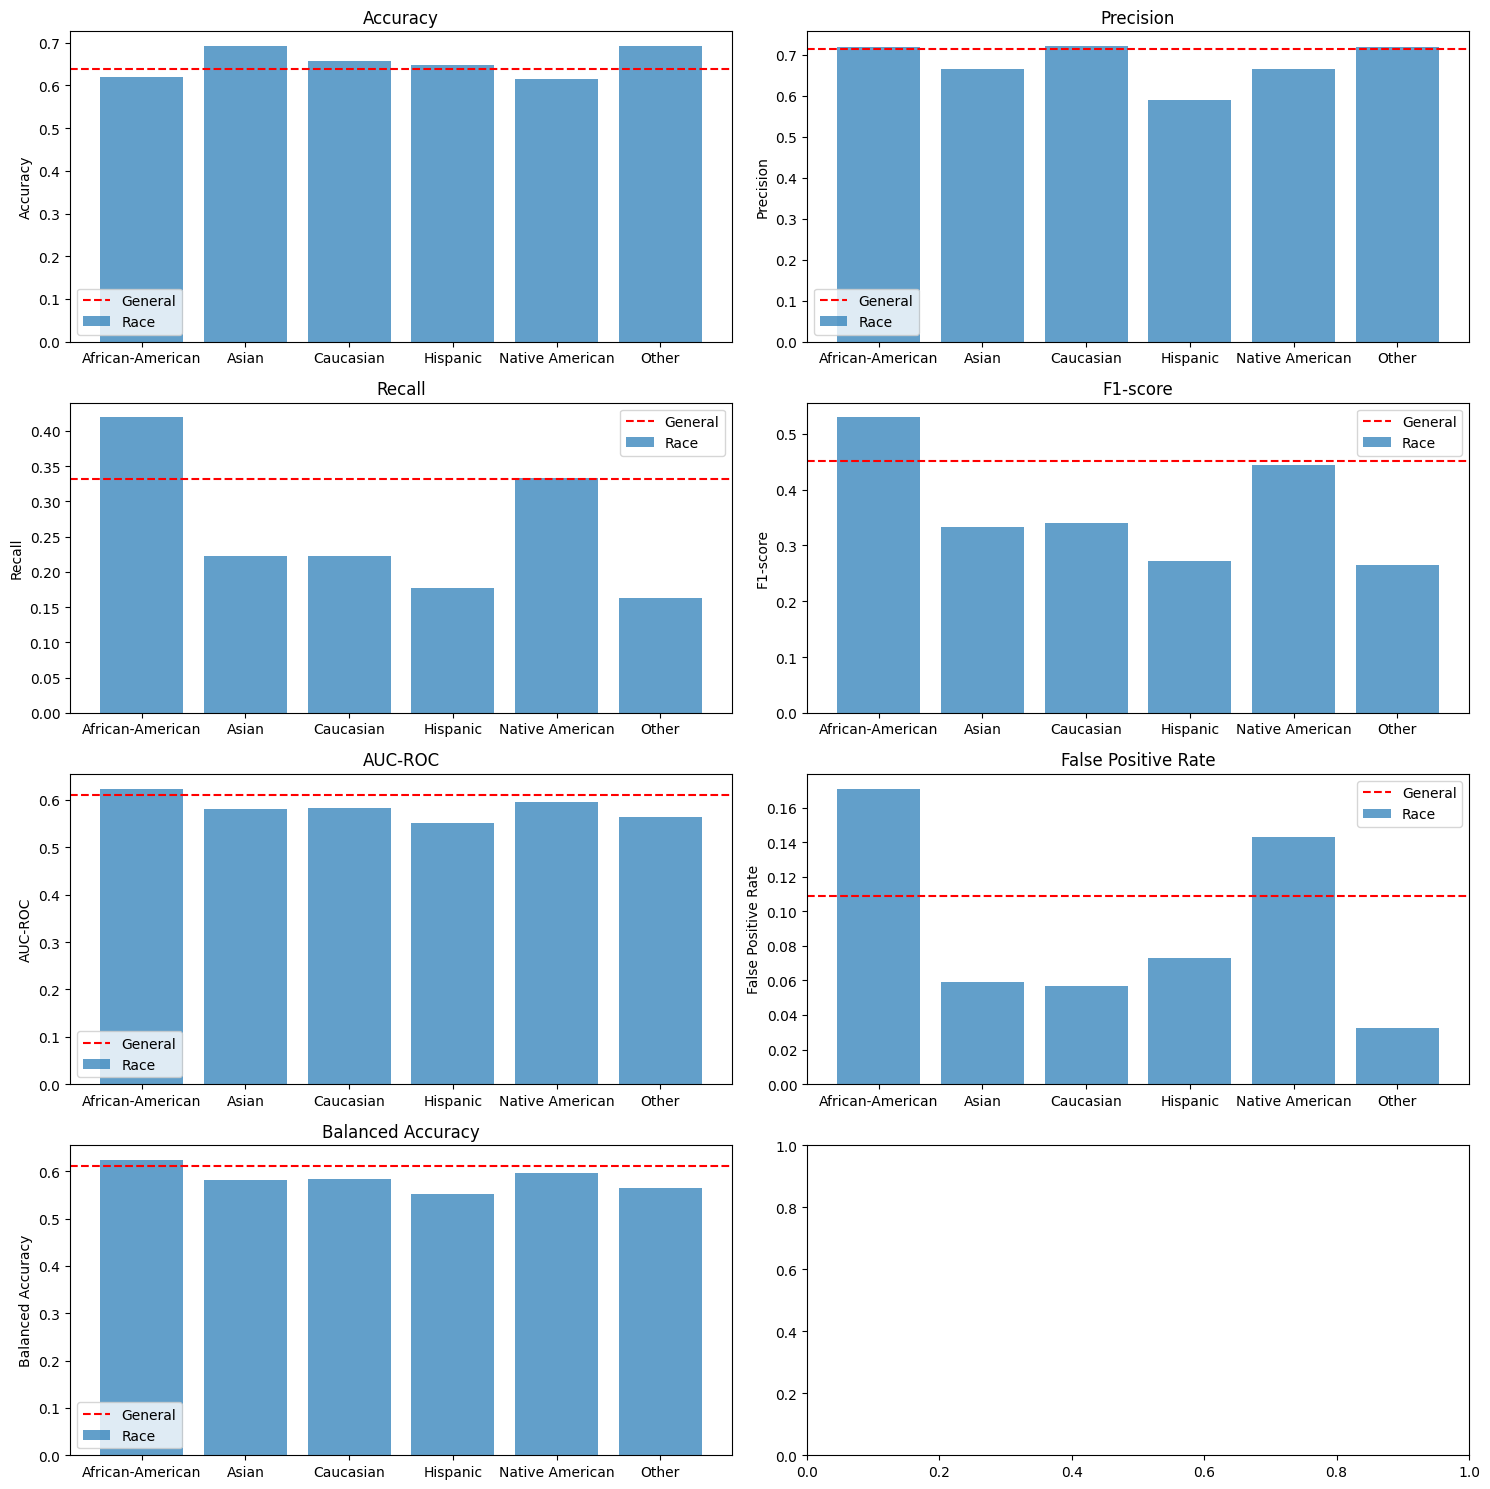

In [129]:
import matplotlib.pyplot as plt

# Function to handle division safely
def safe_div(numerator, denominator):
    return numerator / denominator if denominator else 0

# Convert the race metrics to DataFrames for plotting
race_metrics_df = race_metrics.reset_index()

# Plotting the general metrics vs race metrics
metrics_to_plot = list(general_population_metrics.keys())

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for idx, metric in enumerate(metrics_to_plot):
    axes[idx].bar(race_metrics_df['race'], race_metrics_df[metric], alpha=0.7, label='Race')
    axes[idx].axhline(y=general_population_metrics[metric], color='r', linestyle='--', label='General')
    axes[idx].set_title(metric)
    axes[idx].set_ylabel(metric)
    axes[idx].legend()

plt.tight_layout()
plt.show()


In [130]:
from sklearn.metrics import classification_report

# Evaluate the Compass model
print(classification_report(true_labels, predictions))

              precision    recall  f1-score   support

           0       0.62      0.89      0.73      3362
           1       0.71      0.33      0.45      2752

    accuracy                           0.64      6114
   macro avg       0.67      0.61      0.59      6114
weighted avg       0.66      0.64      0.61      6114



### 5. Baseline Model

In [131]:
# minimalist feature selection
#numeric_columns
#categorical_columns
#datetime_columns
#target

baseline_features = ['age',
                     'age_group',
                     'c_charge_degree',
                     'juv_fel_count',
                     'juv_misd_count',
                     'juv_other_count',
                     'priors_count'
                     ]

numerical_features =  ['age',
                     'juv_fel_count',
                     'juv_misd_count',
                     'juv_other_count',
                     'priors_count'
                     ]

categorical_features =  ['age_group',
                         'c_charge_degree'
                     ]

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from custom_transformers.lowercase_transformer import LowercaseTransformer


# build the pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('lowercase', LowercaseTransformer(categorical_features)),
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = make_pipeline(
    preprocessor,
    #RandomForestClassifier(max_depth=3, min_samples_leaf=.03, class_weight="balanced", random_state=42, n_jobs=-1)
    LogisticRegression(solver='lbfgs')
    #GradientBoostingClassifier(learning_rate=1.0, max_depth=7, n_estimators=100)
    #XGBClassifier(use_label_encoder=True, eval_metric='mlogloss')
    #RandomForestClassifier(max_depth=20, min_samples_leaf=.03, class_weight="balanced", random_state=42, n_jobs=-1)
)

In [133]:
# train model
df_train, df_test = train_test_split(data, test_size=0.3, random_state=42)

In [134]:
df_test

,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,...,r_charge_degree,r_charge_desc,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid,compass_recidivism_prediction,age_group
id,,,,,,,,,,,,,,,,,,,,,
5546,mories abdo,Male,1985-10-09,30,Asian,2013-02-15 04:08:23,2013-02-16 01:20:46,13003356MM10A,2013-02-15,NaT,...,(M1),Possess Cannabis/20 Grams Or Less,0,NaN,NaT,NaN,NaN,0,0,25-34
4666,jennifer kemp,Female,1971-01-30,45,Caucasian,2013-03-03 04:23:16,2013-03-04 03:20:47,13003183CF10A,2013-03-03,NaT,...,(M1),Extradition/Defendants,0,NaN,NaT,NaN,NaN,1,1,45-54
3521,daniel barnard,Male,1988-07-05,27,African-American,2014-04-30 02:11:49,2014-05-30 04:59:14,14006018CF10A,2014-04-30,NaT,...,(F3),Possession of Cocaine,0,NaN,NaT,NaN,NaN,1,0,25-34
2820,peter accetta,Male,1954-01-27,62,Caucasian,2013-03-29 11:06:18,2013-03-30 08:00:38,13004542CF10A,2013-03-29,NaT,...,NaN,NaN,0,NaN,NaT,NaN,NaN,0,0,55-64
6107,camille hendricks,Female,1996-06-24,19,African-American,2014-11-18 01:22:13,2014-11-19 10:10:03,14016488MM10A,2014-11-18,NaT,...,(M1),Battery,1,16000229MM10A,2015-07-19,(M1),Battery,1,0,18-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,jovan larrieux,Male,1988-01-21,28,African-American,2013-12-26 05:11:53,2013-12-27 08:03:01,13024021MM10A,2013-12-26,NaT,...,(F2),Aggravated Battery / Pregnant,1,15002582CF10A,2014-11-24,(F2),Aggravated Battery / Pregnant,1,0,25-34
3605,john hanson,Male,1957-04-15,59,Hispanic,2013-07-10 01:41:52,2013-07-11 08:33:57,13009665CF10A,2013-07-10,NaT,...,(M2),Disorderly Intoxication,0,NaN,NaT,NaN,NaN,1,0,55-64
5779,ryan kirby,Male,1995-08-24,20,Caucasian,2014-05-26 05:28:03,2014-05-27 12:59:07,14007308CF10A,2014-05-26,NaT,...,(M1),Carrying A Concealed Weapon,0,NaN,NaT,NaN,NaN,1,0,18-20


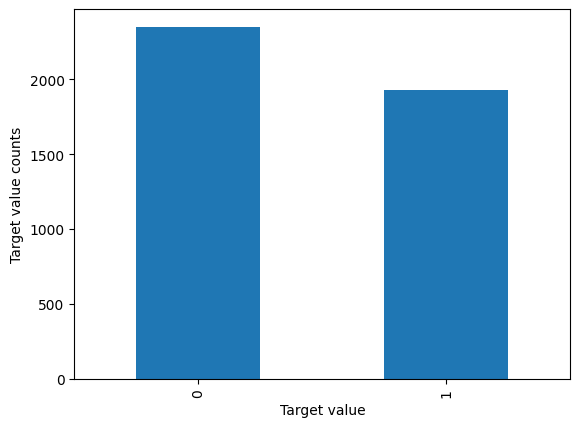

In [135]:
df_train['two_year_recid'].value_counts().plot(kind="bar");
plt.xlabel('Target value');
plt.ylabel('Target value counts');

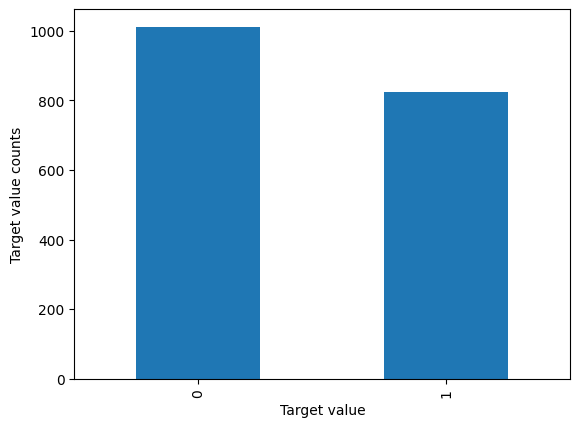

In [136]:
df_test['two_year_recid'].value_counts().plot(kind="bar");
plt.xlabel('Target value');
plt.ylabel('Target value counts');

In [137]:
# Train data
X_train = df_train[baseline_features]
#y_train = df_train[target] == True
y_train = df_train[target]

# Fit the model
pipeline.fit(X_train, y_train)

# Test Data
X_test = df_test[baseline_features]
#y_test = df_test[target]  == True
y_test = df_test[target]

# Make Predictions
y_pred = pipeline.predict(X_test)
#y_pred_train = pipeline.predict(X_train)
y_train.shape

/home/ricky/.virtualenvs/s06/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(4279, 1)

In [138]:
import joblib
import json
import pickle

# Serialization
TMP_DIR = ''
# Serialize the column names from the X DataFrame into a file named columns.json
# YOUR CODE HERE
with open(os.path.join(TMP_DIR, "columns.json"), 'w') as fh:
    json.dump(X_train.columns.tolist(), fh)

# Pickle the dtypes of the columns from the X DataFrame into a file named dtypes.pickle
# YOUR CODE HERE
with open(os.path.join(TMP_DIR,'dtypes.pickle'), 'wb') as fh:
    pickle.dump(X_train.dtypes, fh)
    
# Pickle the fitted pipeline into a file named pipeline.pickle
# YOUR CODE HERE
import joblib
joblib.dump(pipeline, os.path.join(TMP_DIR,'pipeline.pickle'))

['pipeline.pickle']

In [139]:
# Define the true labels and predictions
true_labels = y_test
predictions = y_pred

# Calculate the metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)
auc_roc = roc_auc_score(true_labels, predictions)

# Calculate the confusion matrix for further analysis
conf_matrix = confusion_matrix(true_labels, predictions)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and True Negative Rate (TNR)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
balanced_accuracy = (recall + tnr) / 2

# Display the results
general_population_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'AUC-ROC': auc_roc,
    'False Positive Rate': fpr,
    'Balanced Accuracy': balanced_accuracy
}

general_population_metrics = pd.DataFrame(general_population_metrics, index=['General Population'])
general_population_metrics

,Accuracy,Precision,Recall,F1-score,AUC-ROC,False Positive Rate,Balanced Accuracy
General Population,0.682289,0.686244,0.538835,0.603671,0.669022,0.200791,0.669022


In [140]:
print(len(y_pred))

1835


In [141]:
# reconstruct dataframe with predictions for metric evaluation
data_baseline = df_test.copy()
data_baseline['two_year_recid_baseline_prediction'] = y_pred
data_baseline

,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,...,r_charge_desc,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid,compass_recidivism_prediction,age_group,two_year_recid_baseline_prediction
id,,,,,,,,,,,,,,,,,,,,,
5546,mories abdo,Male,1985-10-09,30,Asian,2013-02-15 04:08:23,2013-02-16 01:20:46,13003356MM10A,2013-02-15,NaT,...,Possess Cannabis/20 Grams Or Less,0,NaN,NaT,NaN,NaN,0,0,25-34,1
4666,jennifer kemp,Female,1971-01-30,45,Caucasian,2013-03-03 04:23:16,2013-03-04 03:20:47,13003183CF10A,2013-03-03,NaT,...,Extradition/Defendants,0,NaN,NaT,NaN,NaN,1,1,45-54,0
3521,daniel barnard,Male,1988-07-05,27,African-American,2014-04-30 02:11:49,2014-05-30 04:59:14,14006018CF10A,2014-04-30,NaT,...,Possession of Cocaine,0,NaN,NaT,NaN,NaN,1,0,25-34,1
2820,peter accetta,Male,1954-01-27,62,Caucasian,2013-03-29 11:06:18,2013-03-30 08:00:38,13004542CF10A,2013-03-29,NaT,...,NaN,0,NaN,NaT,NaN,NaN,0,0,55-64,0
6107,camille hendricks,Female,1996-06-24,19,African-American,2014-11-18 01:22:13,2014-11-19 10:10:03,14016488MM10A,2014-11-18,NaT,...,Battery,1,16000229MM10A,2015-07-19,(M1),Battery,1,0,18-20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,jovan larrieux,Male,1988-01-21,28,African-American,2013-12-26 05:11:53,2013-12-27 08:03:01,13024021MM10A,2013-12-26,NaT,...,Aggravated Battery / Pregnant,1,15002582CF10A,2014-11-24,(F2),Aggravated Battery / Pregnant,1,0,25-34,0
3605,john hanson,Male,1957-04-15,59,Hispanic,2013-07-10 01:41:52,2013-07-11 08:33:57,13009665CF10A,2013-07-10,NaT,...,Disorderly Intoxication,0,NaN,NaT,NaN,NaN,1,0,55-64,0
5779,ryan kirby,Male,1995-08-24,20,Caucasian,2014-05-26 05:28:03,2014-05-27 12:59:07,14007308CF10A,2014-05-26,NaT,...,Carrying A Concealed Weapon,0,NaN,NaT,NaN,NaN,1,0,18-20,1


In [142]:
# Calculate metrics for different racial groups
race_metrics = data_baseline.groupby('race').apply(lambda x: {
    'Accuracy': accuracy_score(x['two_year_recid'], x['two_year_recid_baseline_prediction']),
    'Precision': precision_score(x['two_year_recid'], x['two_year_recid_baseline_prediction'], zero_division=0),
    'Recall': recall_score(x['two_year_recid'], x['two_year_recid_baseline_prediction']),
    'F1-score': f1_score(x['two_year_recid'], x['two_year_recid_baseline_prediction'], zero_division=0),
    'AUC-ROC': roc_auc_score(x['two_year_recid'], x['two_year_recid_baseline_prediction']),
    'False Positive Rate': safe_div(((x['two_year_recid'] == 0) & (x['two_year_recid_baseline_prediction'] == 1)).sum(), (x['two_year_recid'] == 0).sum()),
    'Balanced Accuracy': (recall_score(x['two_year_recid'], x['two_year_recid_baseline_prediction']) + 
                          safe_div(((x['two_year_recid'] == 0) & (x['two_year_recid_baseline_prediction'] == 0)).sum(), (x['two_year_recid'] == 0).sum())) / 2
}).apply(pd.Series)


race_metrics = pd.DataFrame(race_metrics).reset_index()
race_metrics

/tmp/ipykernel_125/289029123.py:11: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  }).apply(pd.Series)


,race,Accuracy,Precision,Recall,F1-score,AUC-ROC,False Positive Rate,Balanced Accuracy
0,African-American,0.680761,0.710280,0.630705,0.668132,0.681732,0.267241,0.681732
1,Asian,0.750000,0.000000,0.000000,0.000000,0.428571,0.142857,0.428571
2,Caucasian,0.679688,0.639752,0.412000,0.501217,0.631641,0.148718,0.631641
3,Hispanic,0.692308,0.638889,0.396552,0.489362,0.631949,0.132653,0.631949
4,Native American,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
5,Other,0.703704,0.684211,0.419355,0.520000,0.649677,0.120000,0.649677


In [143]:
from sklearn.metrics import classification_report

# Predict probabilities for the test set
probabilities = pipeline.predict_proba(X_test)[:, 1]

# Set a new threshold
new_threshold = 0.51
predictions = (probabilities >= new_threshold).astype(int)

# Evaluate the model
print(classification_report(y_test, predictions))

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

# Calculate the false positive rate
fpr = fp / (fp + tn)

print(f"False Positive Rate: {fpr:.2f}")

              precision    recall  f1-score   support

           0       0.67      0.82      0.74      1011
           1       0.69      0.51      0.59       824

    accuracy                           0.68      1835
   macro avg       0.68      0.66      0.66      1835
weighted avg       0.68      0.68      0.67      1835

False Positive Rate: 0.18


#### The expected output of the model is a True/False value that indicates whether or not the defendant is likely to commit new crimes in the two years after being released from jail.
1. After being release from jail, means we have to use c_jail_out as the start date for the 2 years period of recidivism calculation. We are goint to create a target column using the is_recid + r_offense_date and is_violent_recid + vr_offense_date
2. Our target column will indicate risk of recidivism as True when is_recid = 1 and r_offense_date-c_jail_out <=2 years OR is_violent_recid = 1 and vr_offense_date-c_jail_out <=2 years

In [144]:
##calculate optimized threshold
#find best model
#feature engineering (transform dates, count number days in jail, total )

In [145]:
from pandas.tseries.offsets import DateOffset

def add_recidivism_flags(df):
    # Ensure the dates are in datetime format
    df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])
    df['r_offense_date'] = pd.to_datetime(df['r_offense_date'], errors='coerce')
    df['vr_offense_date'] = pd.to_datetime(df['vr_offense_date'], errors='coerce')
    
    # Calculate the 2-year period for recidivism
    two_years_offset = DateOffset(years=2)
    
    # Calculate the recidivism conditions within 2 years
    recidivism_within_2_years = df['is_recid'].eq(1) & (df['r_offense_date'] <= df['c_jail_out'] + two_years_offset)
    violent_recidivism_within_2_years = df['is_violent_recid'].eq(1) & (df['vr_offense_date'] <= df['c_jail_out'] + two_years_offset)
    
    # Calculate the recidivism conditions beyond 2 years
    recidivism_beyond_2_years = df['is_recid'].eq(1) & (df['r_offense_date'] > df['c_jail_out'] + two_years_offset)
    violent_recidivism_beyond_2_years = df['is_violent_recid'].eq(1) & (df['vr_offense_date'] > df['c_jail_out'] + two_years_offset)
    
    # Create the target column for within 2 years
    df['will_recidivate'] = recidivism_within_2_years | violent_recidivism_within_2_years
    
    # Create the flag column for recidivism beyond 2 years
    df['recidivate_beyond_2_years'] = recidivism_beyond_2_years | violent_recidivism_beyond_2_years
    
    return df

In [146]:
data_target = add_recidivism_flags(data)
data_target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6114 entries, 1 to 6114
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   name                           6114 non-null   object        
 1   sex                            6114 non-null   object        
 2   dob                            6114 non-null   datetime64[ns]
 3   age                            6114 non-null   int64         
 4   race                           6114 non-null   object        
 5   c_jail_in                      5854 non-null   datetime64[ns]
 6   c_jail_out                     5854 non-null   datetime64[ns]
 7   c_case_number                  6096 non-null   object        
 8   c_offense_date                 5155 non-null   datetime64[ns]
 9   c_arrest_date                  941 non-null    datetime64[ns]
 10  c_charge_degree                6114 non-null   object        
 11  c_charge_desc         

In [147]:
filtered_df = data_target[data_target['recidivate_beyond_2_years']]
filtered_df

,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,...,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid,compass_recidivism_prediction,age_group,will_recidivate,recidivate_beyond_2_years
id,,,,,,,,,,,,,,,,,,,,,
28,roberto tomlinson,Male,1985-05-10,30,Hispanic,2013-03-23 04:15:49,2013-05-17 07:53:08,13004200CF10A,2013-03-23,NaT,...,1,15010553CF10A,2015-08-15,(F3),Aggravated Assault W/Dead Weap,1,0,25-34,True,True
48,marlon jackson,Male,1995-07-26,20,African-American,2013-04-16 01:55:09,2013-05-24 01:42:34,11019971CF10A,NaT,2011-12-29,...,1,16001515CF10A,2016-02-04,(F3),Aggravated Assault w/Firearm,1,0,18-20,True,True
52,jose ortiz,Male,1978-11-17,37,Caucasian,2013-06-17 12:51:06,2013-06-17 08:23:52,13011612MO10A,2013-06-16,NaT,...,1,14016795MO10A,2014-10-27,(MO3),DOC/Engage In Fighting,1,0,35-44,True,True
124,derrick gorman,Male,1983-06-21,32,Caucasian,2013-02-21 03:26:24,2013-02-22 01:32:44,13002881CF10A,NaT,2013-02-21,...,1,15007708CF10A,2015-06-13,(F2),Aggrav Battery w/Deadly Weapon,1,0,25-34,False,True
140,johnior metayer,Male,1981-09-20,34,African-American,2013-12-22 05:47:01,2013-12-23 08:30:29,13023582MM10A,2013-12-22,NaT,...,0,NaN,NaT,NaN,NaN,0,0,25-34,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5812,anderia gillis,Female,1985-09-03,30,African-American,2013-10-17 06:32:20,2013-10-25 10:48:44,13014543CF10A,NaT,2013-10-17,...,0,NaN,NaT,NaN,NaN,1,1,25-34,False,True
5835,authry heard,Male,1981-09-06,34,African-American,2013-04-11 12:32:24,2013-06-12 11:30:22,13005174CF10A,2013-04-10,NaT,...,0,NaN,NaT,NaN,NaN,0,0,25-34,False,True
5882,clifton mccree,Male,1982-03-05,34,African-American,2014-01-31 12:35:27,2014-02-26 05:50:20,14001687MM10A,2014-01-30,NaT,...,0,NaN,NaT,NaN,NaN,0,0,25-34,False,True
